# ANLP 2019, Assignment 1

*Rodrigo Lopez Portillo Alcocer, 805606* (<=== Put your name and student ID here.)

<div class="alert alert-block alert-danger">Due: Wednesday, November 6, 4pm</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

**NOTE**

Please first fill in your name and id number at the top of the assignment, and **rename** the assignment file to **yourlastname-anlp-1.ipynb**.

Problems and questions are given in text boxes like this one. All text boxes starting with **STUDENT ANSWER** and all code boxes must be filled in by you. They either require code or a (brief!) discussion. In general, please make it obvious _at the first glance_ when something was edited or added by you.

Please hand in your assignment by the deadline via Moodle upload (we will provide a link). In case of questions, you can contact the instructor and the TAs via the moodle forum (preferred) or via email.

You can, and should, make use of packages like `nltk` (see the [NLTK book](http://www.nltk.org/book/)), `numpy`, `matplotlib.pyplot`. And you should be using Python 3.

## Problem 1: Tokenizing

Explore the different *tokenizers* (programms for splitting a text into the word tokens) offered by the NLTK toolkit in the [`nltk.tokenize`](https://www.nltk.org/api/nltk.tokenize.html) package: `TweetTokenizer, SpaceTokenizer, ToktokTokenizer, TreebankWordTokenizer`. Create a short text (perhaps allowing yourself to move to genres like social media writing) for which the tokenizers disagree.

In [2]:
## STUDENT ANSWER
#text found in reddit.com
test = "Hi everyone! I'm Ahmed (@a7md3mad9) the digital artist behind Pink Floyd's The Endless River album art!! wanted to know if any of you would be interested for me sharing my art here :)"

from nltk.tokenize import TweetTokenizer
tknzr1 = TweetTokenizer()
tweet_token = tknzr1.tokenize(test)
#detected usual "special" characters as smileys


from nltk.tokenize import SpaceTokenizer
tknzr2 = SpaceTokenizer()
space_token = tknzr2.tokenize(test) 
#tokenized solely based on space

from nltk.tokenize import ToktokTokenizer
tknzr3 = ToktokTokenizer()
toktok_token = tknzr3.tokenize(test) 
#all non-letter characters where taken as splitting arguments

from nltk.tokenize import TreebankWordTokenizer
tknzr4 = TreebankWordTokenizer()
tree_token = tknzr4.tokenize(test) 
# as found in the manual:
#split standard contractions, e.g. ``don't`` -> ``do n't`` and ``they'll`` -> ``they 'll``
#treat most punctuation characters as separate tokens
#split off commas and single quotes, when followed by whitespace
#separate periods that appear at the end of line
#
#and it also deals with ascii characters like \n, \t, ...

## Problem 2: Zipf's law

Empirically verify Zipf's law. Use the following freely available corpora, which are also provided via the course's Moodle page, if you have problems accessing them:

-  King James Bible, http://www.gutenberg.org/cache/epub/10/pg10.txt
-  The Jungle Book, http://www.gutenberg.org/cache/epub/35997/pg35997.txt
-  SETIMES Turkish-Bulgarian parallel newspaper text, http://opus.lingfil.uu.se/download.php?f=SETIMES2/bg-tr.txt.zip

For each corpus, produce a list of unique word forms sorted by descending frequency. Preferably using the Python libraries `numpy` and `matplotlib`, plot the  frequency  curves  for  the  corpora.  Make  sure  to  provide  both  a  linear curve, and a log-log curve (see methods `matplotlib.pyplot.plot` and `matplotlib.pyplot.loglog`). 

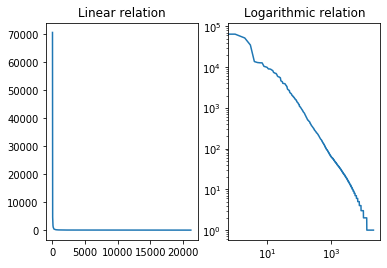

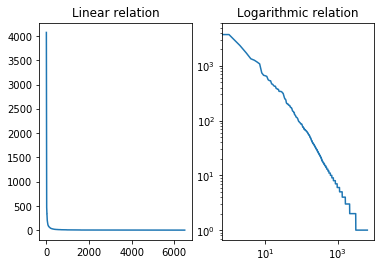

In [3]:
## STUDENT ANSWER
import nltk
from itertools import groupby

def CountFrequency(my_list): 
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

def Zipf_law_verifier(file):
    f= open(file,"r")
    text = f.read()
    head = text[0:].lower()
    tokenized = tknzr4.tokenize(head)
    frequencies = CountFrequency(tokenized)
    sorted_values = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)
    rank = range(0, len(sorted_values))
    values = [sorted_values[i][1] for i in rank]
    
    plt.figure()

    #linear
    plt.subplot(121)
    plt.plot(rank, values)
    plt.title("Linear relation")

    #log
    plt.subplot(122)
    plt.loglog(rank, values)
    plt.title("Logarithmic relation")

#King James Bible
Zipf_law_verifier("pg10.txt")


#The Jungle Book
Zipf_law_verifier("pg35997.txt")

#Did not manage to open the third file.

## Problem 3: WordNet

Familiarise yourself with WordNet, via the interface offered by `nltk` (see [the NLTK WordNet interface](http://www.nltk.org/howto/wordnet.html)). Find some examples of synsets, of relations that they are in, and of lemmas of those relata. Try to walk up and down the ontology from a given starting point.

In [8]:
from nltk.corpus import wordnet as wn

In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/rlpa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Problem 3.A: Explore Definitions

A given word can mean many diferent things, and thus most words have multiple synsets. Using WordNet, print each definition of the word "python".

In [14]:
## STUDENT ANSWER 
[print(i.definition()) for i in wn.synsets('python')];

large Old World boas
a soothsaying spirit or a person who is possessed by such a spirit
(Greek mythology) dragon killed by Apollo at Delphi


Next, print the definitions of the word "bug", but only of the senses of the word that are nouns.

In [15]:
## STUDENT ANSWER
[print(i.definition()) for i in wn.synsets('bug', pos=wn.NOUN)];

general term for any insect or similar creeping or crawling invertebrate
a fault or defect in a computer program, system, or machine
a small hidden microphone; for listening secretly
insects with sucking mouthparts and forewings thickened and leathery at the base; usually show incomplete metamorphosis
a minute life form (especially a disease-causing bacterium); the term is not in technical use


### Problem 3.B: Exploring the Ontology

Write a function that can find common hypernyms between two words using WordNet. Can you find a common hypernym between *muntjac* and *caribou*? 

In [16]:
# STUDENT ANSWER
def common_hypernyms(w1, w2):
    w1_hyper = wn.synsets(w1)[0].hypernyms()
    w2_hyper = wn.synsets(w2)[0].hypernyms()
    [print(i) for i in w1_hyper if (i in w2_hyper)]

In [17]:
common_hypernyms('muntjac', 'caribou')

Synset('deer.n.01')


Of course, hypernyms themselves often have hypernyms. Write a function that returns the first hypernym of a word and then travels up the taxonomy (finding the first hypernym of that hypernym, then the first hypernym of *that* hypernym, and so on) until it reaches a word with no hypernym. Find this chain of hypernyms for the word "city".

(**Bonus exercise**, for extra credit: explore *all* paths upwards, and explain [in a separate text cell] why there can be more than one.)

In [18]:
# STUDENT ANSWER
def hypernyms_chain(w):
    chain = []
    w_hyper = wn.synsets(w)[0].hypernyms()
    chain.append(w_hyper[0])
    i=0
    while len(w_hyper) !=0:
        w_hyper = chain[i].hypernyms()
        if len(w_hyper) !=0:
            chain.append(w_hyper[0])
        i +=1
    return chain
hypernyms_chain('city')

[Synset('municipality.n.01'),
 Synset('administrative_district.n.01'),
 Synset('district.n.01'),
 Synset('region.n.03'),
 Synset('location.n.01'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

In [19]:
# Trying recursive version
first_synset = wn.synsets('city')[0]

def hypernyms_chain_recursive(first_synset):
    current_hypers = first_synset.hypernyms()
    if len(current_hypers)!=0:
        print(current_hypers[0])
        return hypernyms_chain_recursive(current_hypers[0])
hypernyms_chain_recursive(first_synset)

Synset('municipality.n.01')
Synset('administrative_district.n.01')
Synset('district.n.01')
Synset('region.n.03')
Synset('location.n.01')
Synset('object.n.01')
Synset('physical_entity.n.01')
Synset('entity.n.01')


In [20]:
#BONUS
#It should work if we combine the list result of the first version and the recursive aspect
#of the second
initial_synset = wn.synsets('dog')[0]
# STUDENT ANSWER
def modified_hypernyms_chain(w):
    chain = []
    w_hyper = w.hypernyms()
    if len(w_hyper)!=0:
        chain.append(w_hyper[0])
        i=0
        while len(w_hyper) !=0:
            w_hyper = chain[i].hypernyms()
            if len(w_hyper) !=0:
                chain.append(w_hyper[0])
            i +=1
        return chain
    else:
        return chain

def all_chains(w):
    print(modified_hypernyms_chain(w))
    return(all_chains(modified_hypernyms_chain(w)[-2]))

# NOT WORKING
# if it doesn't work recursively, I would try to keep track of the number of hypernyms each iteration
#generates and then loop through them.

## Problem 4: Word Embeddings

Please load the word embeddings trained on the Google News corpora using the [gensim](https://radimrehurek.com/gensim/index.html) package. First, make sure that you have the gensim package installed on your computer. You can find the model [here](https://drive.google.com/uc?id=0B7XkCwpI5KDYNlNUTTlSS21pQmM). The model has a size of 1.5GB, so make sure you have some free memory before you load it. It is also possible to use one of the pre-trained glove models [here](https://nlp.stanford.edu/projects/glove/)

In [22]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

### Problem 4.A: Exploration

The gensim package has many easy to use functions, such as [most_similar()](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.most_similar), [doesnt_match()](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.doesnt_match), and [similarity()](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.FastTextKeyedVectors.similarity), among others. Experiment with those functions to find interesting relations in the word embeddings. Please especially look for (gender, ethnic, ...) bias you can find. Try to look further than just a few well-known examples.

In [23]:
## STUDENT ANSWER
mammals = ['dog', 'cat', 'hamster', 'deer']
materials = ['wood', 'gold', 'stone', 'plastic']
objects = ['table', 'airplane', 'planet', 'god']
#model.most_similar(positive=materials, topn=5);

model.most_similar(positive =['man', 'woman', 'intelligence'])

[('girl', 0.642989993095398),
 ('teenage_girl', 0.6354055404663086),
 ('teenager', 0.6062909364700317),
 ('boy', 0.6034687161445618),
 ('policewoman', 0.5718212127685547),
 ('horribly_horribly_deranged', 0.5667262077331543),
 ('Attempted_carjacking', 0.5562105178833008),
 ('policeman', 0.5501536130905151),
 ('Missing_canoeist', 0.5497705936431885),
 ('person', 0.5380359888076782)]

In [24]:
def similarity_comparison(w1, w2, test):
    rel1 = model.similarity(w1, test)
    rel2 = model.similarity(w2, test)
    diff = str(abs(rel1 - rel2))
    if rel1>rel2:
        print(w1+" has a higher similarity to "+ test+" than "+w2+". The difference between both similarity measures is "+ diff )
    else:
        print(w2+" has a higher similarity to "+ test+" than "+w1+". The difference between both similarity measures is "+ diff )

similarity_comparison('man', 'woman', 'intelligence')
similarity_comparison('white', 'black', 'criminal')
similarity_comparison('woman', 'man', 'pervert')
similarity_comparison('wife', 'husband', 'weak')
similarity_comparison('latino', 'asian', 'intelligence')
similarity_comparison('homosexual', 'heterosexual', 'bad')

#do these comparison really reflect biases?
#How to trace back the origin of these numbers?

man has a higher similarity to intelligence than woman. The difference between both similarity measures is 0.007785693
black has a higher similarity to criminal than white. The difference between both similarity measures is 0.042729862
man has a higher similarity to pervert than woman. The difference between both similarity measures is 0.04322961
wife has a higher similarity to weak than husband. The difference between both similarity measures is 0.0109444
asian has a higher similarity to intelligence than latino. The difference between both similarity measures is 0.041579433
homosexual has a higher similarity to bad than heterosexual. The difference between both similarity measures is 0.0029412135


### Problem 4B: Paraphraser

Sometimes it might be useful to paraphrase a sentence. With similar words having similar word embeddings, it is possible to use them for a simple paraphraser system. Implement such a paraphraser using the `most_similar()` function. Discuss (briefly) whether this is a sensible approach to this problem or not.

In [25]:
## STUDENT ANSWER
from nltk.tokenize.treebank import TreebankWordDetokenizer
def paraphraser(sentence, word):
    tokens = np.asarray(tknzr4.tokenize(sentence))
    word_index = np.where(tokens == word)[0][0]
    most_similar_candidate = model.most_similar(positive=[tokens[word_index]])[0][0]
    tokens[word_index] = most_similar_candidate
    new_sentence = TreebankWordDetokenizer().detokenize(tokens)
    return "The original sentence was: '" + sentence+"' and our paraphraser outputs: '"+new_sentence+"'."
    
paraphraser('Today was a good day', 'good'); #good result
paraphraser('Hey! What would you like to do tomorrow?', 'tomorrow'); #the meaning changed
paraphraser('I like eating and running at the same time', 'time'); #again, wrong
paraphraser('Sitting next to the water relaxes me', 'water') #hä?

#From these examples we can conclude that such a simple paraphraser, although is performs well for simple adjectives
#like 'good', is not enough to properly paraphrase a sentence in which words with multiple meanings 
#or several suffixes are involved. 
#On top of this, a word-by-word paraphraser will ignore any contextual relations that words
#might have with each other!

"The original sentence was: 'Sitting next to the water relaxes me' and our paraphraser outputs: 'Sitting next to the potable relaxes me'."

### Problem 4C [Bonus]: Evaluate Word Embedding

If you still have time, try to answer the following question, for extra credit.

With the model, Google also released syntactic and semantic test examples, following the "A is to B as C is to D" style. The evaluation file can be found [here](https://raw.githubusercontent.com/RaRe-Technologies/gensim/develop/gensim/test/test_data/questions-words.txt). Use these examples to evaluate the model. What is the accuracy of the model on these evaluation examples?

In [14]:
## STUDENT ANSWER

Try to find some interesting examples of relations the model did not predict correctly: look at a few examples from each section of the data, and compare them to the model's predictions. Do you think this evaluation is helpful? Please comment briefly!

In [15]:
## STUDENT ANSWER

Using word embeddings, words or phrases can be mapped to a continuous vector space (e.g. Word2Vec, GloVe). In your opinion, is there a limitation to this approach? Discuss briefly below.

*(Your answer goes here.)*